Give me a mass for the first joint: 1
Give me a mass for the second joint: 1
Give me a length for the first arm: 1
Give me a length for the second arm: 1


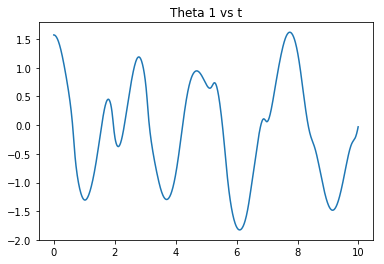

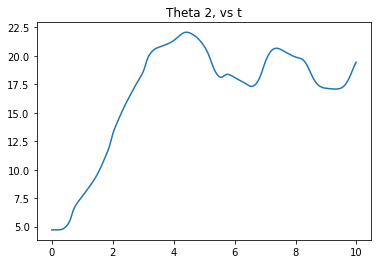

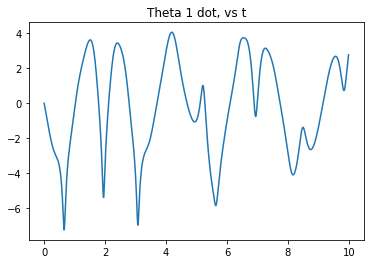

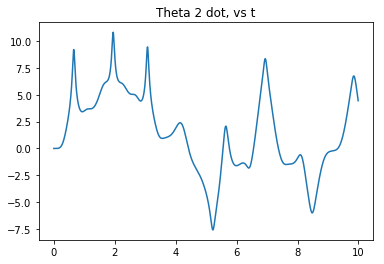

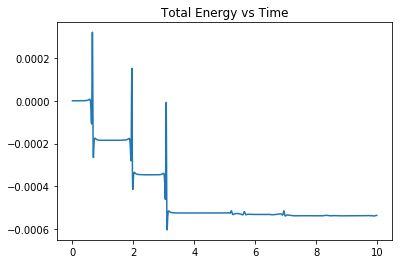

In [5]:
#Double Pendulum - From Newman

#Use 4th Order Runge Kutta to Program - equations of motion are at the bottom of this link:
#http://lampx.tugraz.at/~hadley/num/ch8/rk4ode2.php?fbclid=IwAR3qkKjQM9RjJ7VQMqFiGweXnL9AUIMAQf0RwqROS_IEzXxasf0_bozGmWc

#Let the user input the lengths and masses 

import numpy as np
import matplotlib.pyplot as plt

m1 = float(input("Give me a mass for the first joint: "))
m2 = float(input("Give me a mass for the second joint: "))
l1 = float(input("Give me a length for the first arm: "))
l2 = float(input("Give me a length for the second arm: "))

g = 9.81

#order of r = [theta1, omega1, theta2, omega2]
def f(r,t):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    dtheta1 = omega1
    dtheta2 = omega2
    
    
    #Here I grouped the numerator and denominator terms instead of one long expression for domega/dt:
    
    no1 = -g*(2*m1 + m2)*np.sin(theta1) - m2*g*np.sin(theta1-2*theta2) - 2*np.sin(theta1-theta2)*m2*(omega2**2*l2 + omega1**2*l1*np.cos(theta1-theta2))
    do1 = l1*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2))
    domega1 = no1/do1
    
    no2 = 2*np.sin(theta1-theta2) * (omega1**2*l1*(m1+m2)+g*(m1+m2)*np.cos(theta1)+omega2**2*l2*m2*np.cos(theta1-theta2))
    do2 = l2*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2))
    
    domega2 = no2/do2

    
    return np.array([dtheta1, domega1, dtheta2, domega2])

a = 0.0
b = 10.0
N = 1000
dt = (b-a)/N

tpoints = np.arange(a,b,dt)
theta1points = []
omega1points = []
theta2points = []
omega2points = []
totalEpoints = []

#Define an intital condition for each angle and angular velocity

r = np.array([np.pi/2,0,3*np.pi/2,0], float)

#Here we apply the 4th order Runge-Kutta Method to solve these differential equations

for t in tpoints:
    theta1points.append(r[0])
    omega1points.append(r[1]) 
    theta2points.append(r[2])
    omega2points.append(r[3])
        
    # keep track of the total energy:
    # we do this by taking the last element of each of the lists (that we just updated) and plug them into the 
    # kinetic energy and potential energy equations. total energy is KE + PE, and finally add that value to our
    # list of energies. Ideally, it should just be a straight line. 
    
    # Energy SHOULDN'T be updated using the Runge-Kutta method because we're not using some time step-size to
    # calculate the new energy. It's a scalar value, completely separate from the differential equations.
    
    KE = (0.5*m1*(l1**2)*(omega1points[-1]**2) + 
          0.5*m2*((l1**2)*(omega1points[-1]**2) + 
                  (l2**2)*(omega2points[-1]**2) + 2*l1*l2*omega1points[-1]*omega2points[-1]*np.cos(theta1points[-1]-theta2points[-1])))
    
    PE = -(m1+m2)*g*l1*np.cos(theta1points[-1]) - m2*g*l2*np.cos(theta2points[-1])
    totalE = KE + PE
    totalEpoints.append([totalE])
    
    k1 = dt*f(r,t)
    k2 = dt*f(r + 0.5*k1, t + 0.5*dt)
    k3 = dt*f(r + 0.5*k2, t + 0.5*dt)
    k4 = dt*f(r + k3, t + dt)
    r = r + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

"""

The following is a way to correct the increasing behavior of the theta2 vs t plot by capping the value at 2*pi:

theta2pointsc = theta2points.copy()

for i in range(len(theta2pointsc)):
    theta2pointsc[i] = theta2pointsc[i]%(2*np.pi) - np.pi
    
plt.plot(tpoints,theta2pointsc)

"""
    
plt.plot(tpoints,theta1points)
plt.title("Theta 1 vs t")
plt.figure()
plt.plot(tpoints, theta2points)
plt.title("Theta 2, vs t")
plt.figure()

plt.plot(tpoints, omega1points)
plt.title("Theta 1 dot, vs t")
plt.figure()
plt.plot(tpoints, omega2points)
plt.title("Theta 2 dot, vs t")

plt.figure()
plt.title("Total Energy vs Time")
plt.plot(tpoints, totalEpoints)
plt.show()
# """holdconstant = []

# #For this for loop, cross out the second condition in the if statement because its always true LMAO
# for i in range(len(omega1points)):
#     if max(omega1points) - 1 < omega1points[i] and omega1points[i] < max(omega1points) + 1 and min(theta1points) + 1 > theta1points[i]:
#         holdconstant.append([theta2points[i], omega2points[i]])
        
# print(holdconstant)"""



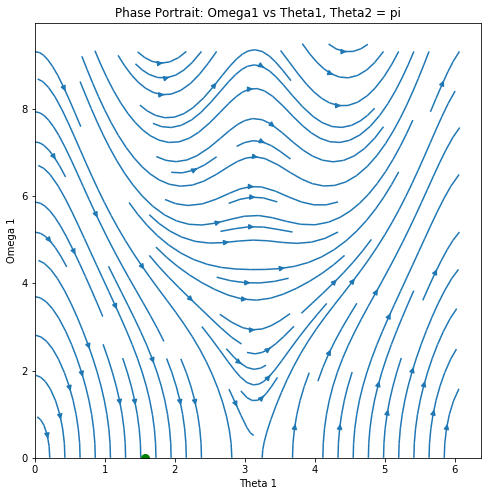

In [17]:
# Phase Portrait 

#Creates values to use for the diffeq's and to make the plot
theta1values, omega1values = np.meshgrid(np.arange(0,2*np.pi, np.pi/16), np.arange(0,10,0.5))
theta1dot = omega1values
#Fix the values for m1, m2, l1, l2, theta2 to be able to pass through and make a phase portrait using the method in workshop
m1 = 1
m2 = 1
l1 = 1
l2 = 1
# because theta1values is a 2D array: 20 elements, in which each of those elements is 32 elements long, we hold
# theta2 constant at x for all values of the 2D array
theta2values = np.array(np.ones((20,32)))*np.pi
# additionally, we would want to do the same thing for omega2. Because we hold theta2 constant, then omega2 would
# be zero at all points
omega2values = np.array(np.zeros((20,32)))

# same setup as in the Runge-Kutta part, except now I'm plugging the "-values" variables, which are arrays. plug
# these into omega1dot. 
no1 = (-g*(2*m1 + m2)*np.sin(theta1values) - 
       m2*g*np.sin(theta1values-2*theta2values) - 
       2*np.sin(theta1values-theta2values)*m2*(omega2values**2*l2 + omega1values**2*l1*np.cos(theta1values-theta2values)))

do1 = l1*(2*m1 + m2 - m2*np.cos(2*theta1values - 2*theta2values))

omega1dot = no1/do1

# now, we have all the pieces for a phase portrait:

plt.figure(figsize=(8,8))
plt.streamplot(theta1values, omega1values, theta1dot, omega1dot)
plt.plot(theta1points[0],omega1points[0],'go',markersize=8)
#plt.plot(theta1points, omega1points,color='r', label="numerical")
plt.ylabel("Omega 1")
plt.xlabel("Theta 1")
plt.title("Phase Portrait: Omega1 vs Theta1, Theta2 = pi")
plt.show()



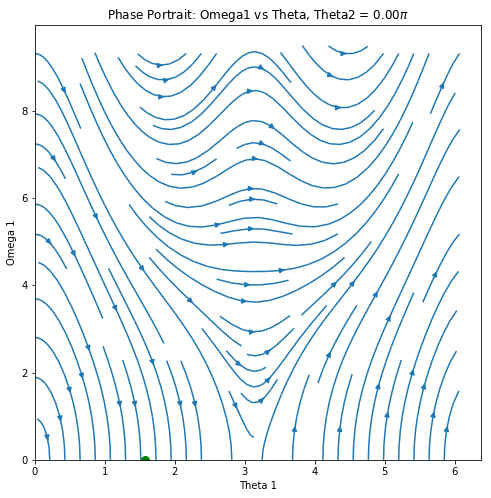

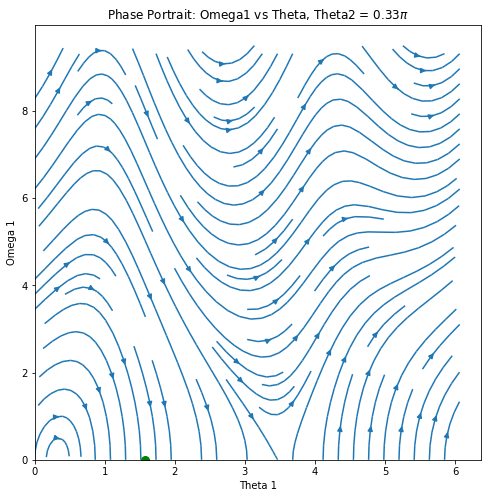

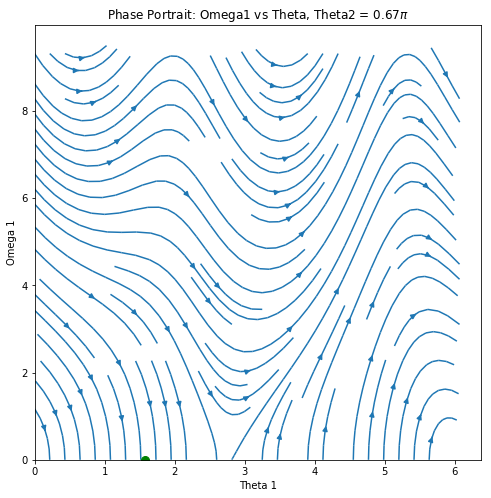

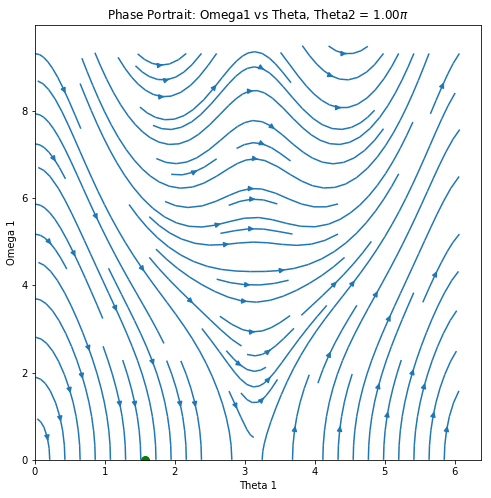

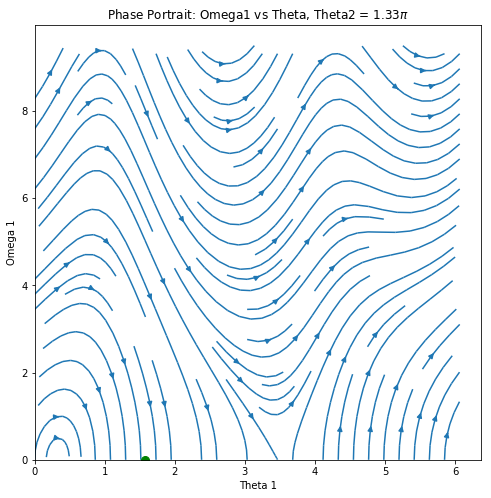

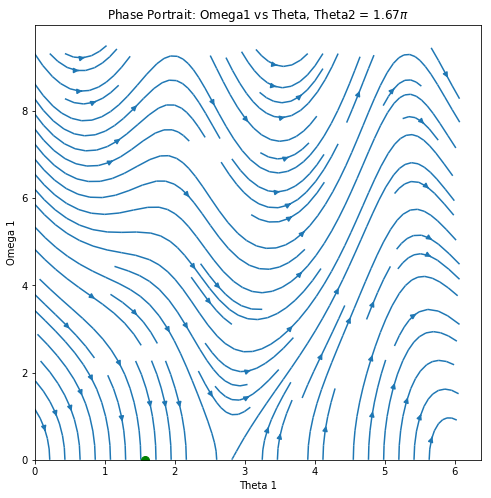

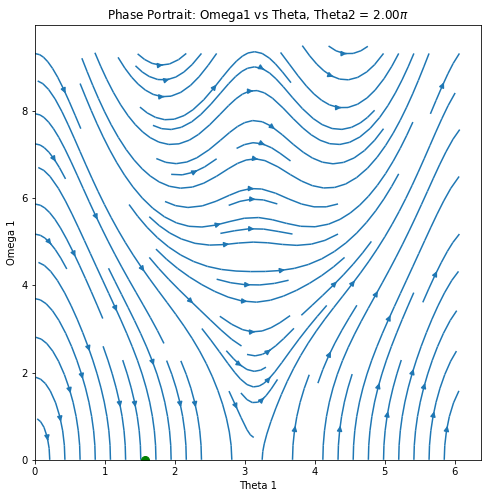

In [24]:
# "for loop" for phase portraits of our system of different constant values of theta2, omega2 = 0
# range: 0 to 2pi. We want to have several slices, so lets just change theta2 by pi/3 each time. 

# initial conditions

m1 = 1
m2 = 1
l1 = 1
l2 = 1
omega2values = np.array(np.zeros((20,32)))
theta2values = np.array(np.ones((20,32)))


for i in range(7):
    # set theta2 to new value
    # "theta2 goes from 0 to 2pi in steps of size pi/3"
    theta2values = theta2values*(i*np.pi/3)
    
    # Now that we've set theta2, we need to update the theta1 and omega1 at this new constant:
    no1 = (-g*(2*m1 + m2)*np.sin(theta1values) - 
    m2*g*np.sin(theta1values-2*theta2values) - 
    2*np.sin(theta1values-theta2values)*m2*(omega2values**2*l2 + omega1values**2*l1*np.cos(theta1values-theta2values)))

    do1 = l1*(2*m1 + m2 - m2*np.cos(2*theta1values - 2*theta2values))

    omega1dot = no1/do1

    #change title of plot per loop:
    title = ("Phase Portrait: Omega1 vs Theta, Theta2 = %.2f" %((theta2values[0][0] / np.pi))) + r"$ \pi $"

    # plotting them:
    plt.figure(figsize=(8,8))
    plt.streamplot(theta1values, omega1values, theta1dot, omega1dot)
    plt.plot(theta1points[0],omega1points[0],'go',markersize=8)
    plt.ylabel("Omega 1")
    plt.xlabel("Theta 1")
    plt.title(title)
    
    # reset theta2 to ones so we can multiply 1 by a new constant next loop:
    theta2values = np.array(np.ones((20,32)))
    